## Import Required Modules

In [43]:
#Required Modules

import numpy as  np
import pandas as pd 
import matplotlib.pyplot as plt
from  sklearn.preprocessing import MinMaxScaler

# Exploratory Data Analysis (EDA)

### Dataset Link : https://finance.yahoo.com/quote/BMW.DE/history

* The data is time series we can bulid RNN-LSTM Model

In [44]:
#Collecting and Reading  csv data Netflix data 

data = pd.read_csv('BMW.DE.csv')
print(data.shape)
data.head() # First five value from data

(6601, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-11-08,18.209999,18.209999,18.171000,18.171000,9.333748,767000
1,1996-11-11,18.190001,18.200001,18.082001,18.122000,9.308578,260000
2,1996-11-12,18.160999,18.327999,18.091999,18.259001,9.378949,1066000
3,1996-11-13,18.344000,18.344000,18.190001,18.230000,9.364054,793000
4,1996-11-14,18.205000,18.289000,18.132000,18.289000,9.394361,351000


In [45]:
# General insights of data

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6601 non-null   object 
 1   Open       6601 non-null   float64
 2   High       6601 non-null   float64
 3   Low        6601 non-null   float64
 4   Close      6601 non-null   float64
 5   Adj Close  6601 non-null   float64
 6   Volume     6601 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 361.1+ KB


In [46]:
data.isnull().sum() # It returns the count number of missing values in the data set

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Spliting Data as Train & Test

In [47]:
#Training Data is taken between 1996 to 2018

data_training = data[data['Date'] < '2018-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-11-08,18.209999,18.209999,18.171000,18.171000,9.333748,767000
1,1996-11-11,18.190001,18.200001,18.082001,18.122000,9.308578,260000
2,1996-11-12,18.160999,18.327999,18.091999,18.259001,9.378949,1066000
3,1996-11-13,18.344000,18.344000,18.190001,18.230000,9.364054,793000
4,1996-11-14,18.205000,18.289000,18.132000,18.289000,9.394361,351000
...,...,...,...,...,...,...,...
5429,2017-12-21,86.930000,88.050003,86.820000,87.839996,67.110451,1500394
5430,2017-12-22,87.709999,87.709999,86.989998,87.519997,66.865974,954800
5431,2017-12-27,87.860001,88.220001,87.250000,87.260002,66.667343,593335
5432,2017-12-28,87.400002,87.400002,86.900002,87.139999,66.575661,750441


In [48]:
#Testing Data is taken between 2018 to 2022

data_test = data[data['Date'] >= '2018-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
5434,2018-01-02,86.769997,86.820000,83.879997,86.400002,66.010292,2673332
5435,2018-01-03,87.000000,87.360001,86.459999,86.860001,66.361740,1396762
5436,2018-01-04,87.800003,88.339996,87.379997,87.480003,66.835419,1872794
5437,2018-01-05,87.000000,88.739998,87.000000,88.500000,67.614708,1911027
5438,2018-01-08,89.150002,90.309998,89.110001,89.669998,68.508598,2298840
...,...,...,...,...,...,...,...
6596,2022-08-03,78.930000,79.000000,75.459999,76.570000,76.570000,3479341
6597,2022-08-04,77.339996,78.110001,75.959999,76.269997,76.269997,1768831
6598,2022-08-05,75.839996,77.239998,75.559998,76.610001,76.610001,1460610
6599,2022-08-08,77.089996,78.099998,76.910004,78.099998,78.099998,969376


In [49]:
# We have drop date and Adj Close as it will not affect the digits of stocks.

training_data = data_training.drop(['Date', 'Adj Close'],axis = 1)
print(training_data.shape)
training_data.head(10)

(5434, 5)


,Open,High,Low,Close,Volume
0,18.209999,18.209999,18.171000,18.171000,767000
1,18.190001,18.200001,18.082001,18.122000,260000
2,18.160999,18.327999,18.091999,18.259001,1066000
3,18.344000,18.344000,18.190001,18.230000,793000
4,18.205000,18.289000,18.132000,18.289000,351000
5,18.308001,18.440001,18.268999,18.438000,624000
6,18.372999,18.584000,18.365999,18.466000,624000
7,18.485001,18.544001,18.313999,18.544001,442000
8,18.485001,18.603001,18.243000,18.250999,546000
9,18.308001,18.308001,18.194000,18.268999,286000


In [50]:
# We have normalize the data to 0 to 1 range.

scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00877191, 0.00372868, 0.02080498, 0.01071428, 0.02670655],
       [0.00858329, 0.0036343 , 0.01995209, 0.01025009, 0.00905307],
       [0.00830973, 0.00484257, 0.02004791, 0.01154794, 0.03711758],
       ...,
       [0.66572344, 0.66460566, 0.68279829, 0.66521412, 0.02065963],
       [0.66138464, 0.65686507, 0.67944421, 0.6640773 , 0.02612998],
       [0.66147898, 0.65695949, 0.67800672, 0.66114061, 0.02528968]])

In [51]:
# Declaring trainng data

X_train = []
y_train = []

In [52]:
training_data.shape[0]

5434

In [53]:
time_step = 60

for i in range(time_step,training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

### Creating X_train and y_train from Train data

* We have train data composed of stock open prices over days.
* So, it has 5434 prices corresponding 5434 days.
* My aim is to predict the open price of the next day.
* I can use a time step 60 days.
* I will pick first 60 open prices (0 to 60), 1st 60 price will be in X_train data.
* Then predict the price of 61th day; and 61th price will be in y_train data.
* Again, i will pick prices from  1 to 61, those will be in X_train data.
* Then predict the next days price,  62nd price will be in y_train data.

In [54]:
# Coverny list data into numpy array

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(5374, 60, 5)
(5374,)


# Build LSTM model

In [58]:
#Importing required tensorflow modules

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [61]:
# initializing the LSTM
regressor = Sequential()

# adding first LSTM layer and dropout regulatization
regressor.add(LSTM(units = 60, 
              activation = "relu", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],5)))
regressor.add(Dropout(0.2))


# adding second LSTM layer and dropout regulatization

regressor.add(LSTM(units = 80, 
              activation = "relu", 
              return_sequences = True))
regressor.add(Dropout(0.5))

# adding third LSTM layer and dropout regulatization

regressor.add(LSTM(units = 80, 
              activation = "relu", 
              return_sequences = True))
regressor.add(Dropout(0.5))

# adding fourth LSTM layer and dropout regulatization

regressor.add(LSTM(units = 120, activation = "relu"))
regressor.add(Dropout(0.5))

# adding the output fc layer

regressor.add(Dense(units = 1))

In [62]:
#Summary of our model

regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_1 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            51520     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [63]:
#Compile Our model

regressor.compile(optimizer='RMSprop', loss = 'mean_squared_error')

In [64]:
#fitting the LSTM

history = regressor.fit(X_train, y_train, epochs = 30, batch_size = 64)

Epoch 1/30
84/84 [==============================] - 28s 260ms/step - loss: 0.0151
Epoch 2/30
84/84 [==============================] - 22s 265ms/step - loss: 0.0070
Epoch 3/30
84/84 [==============================] - 25s 302ms/step - loss: 0.0058
Epoch 4/30
84/84 [==============================] - 55s 653ms/step - loss: 0.0047
Epoch 5/30
84/84 [==============================] - 38s 452ms/step - loss: 0.0043
Epoch 6/30
84/84 [==============================] - 42s 495ms/step - loss: 0.0036
Epoch 7/30
84/84 [==============================] - 37s 439ms/step - loss: 0.0033
Epoch 8/30
84/84 [==============================] - 37s 438ms/step - loss: 0.0033
Epoch 9/30
84/84 [==============================] - 35s 410ms/step - loss: 0.0028
Epoch 10/30
84/84 [==============================] - 35s 414ms/step - loss: 0.0026
Epoch 11/30
84/84 [==============================] - 35s 411ms/step - loss: 0.0025
Epoch 12/30
84/84 [==============================] - 34s 409ms/step - loss: 0.0024
Epoch 13/30
8

In [65]:
history.history.keys()

dict_keys(['loss'])

## Represent test Data

In [66]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5434,2018-01-02,86.769997,86.820000,83.879997,86.400002,66.010292,2673332
5435,2018-01-03,87.000000,87.360001,86.459999,86.860001,66.361740,1396762
5436,2018-01-04,87.800003,88.339996,87.379997,87.480003,66.835419,1872794
5437,2018-01-05,87.000000,88.739998,87.000000,88.500000,67.614708,1911027
5438,2018-01-08,89.150002,90.309998,89.110001,89.669998,68.508598,2298840


In [67]:
df = data_test.drop(['Date', 'Adj Close'], axis = 1)

In [69]:
# We have normalize the data to 0 to 1 range.
#Normalization

inputs = scaler.transform(df)
inputs

array([[0.65544232, 0.65139   , 0.6505031 , 0.6570671 , 0.09308407],
       [0.65761175, 0.65648747, 0.6752276 , 0.6614248 , 0.04863455],
       [0.66515752, 0.66573838, 0.68404407, 0.66729826, 0.06520974],
       ...,
       [0.55234856, 0.56095717, 0.57077143, 0.56432362, 0.05085771],
       [0.56413878, 0.56907535, 0.58370872, 0.57843879, 0.03375318],
       [0.57272211, 0.57152972, 0.58390035, 0.56887075, 0.03638564]])

In [70]:
# Declaring Tesing variable

X_test = []
y_test = []

time_step = 60

for i in range(time_step, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [71]:
# Coverny list data into numpy array

X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(1107, 60, 5)
(1107,)


In [78]:
# Storing pediction data 

y_pred = regressor.predict(X_test)

35/35 [==============================] - 2s 46ms/step


In [79]:
scaler.scale_

array([9.43218243e-03, 9.43975088e-03, 9.58313387e-03, 9.47328560e-03,
       3.48194968e-08])

In [82]:
# Declare variable renormalizations
scale = 1 / 9.43218243e-03
scale

106.02000199014387

In [83]:
# Renormalize the data

y_pred = y_pred*scale
y_test = y_test*scale


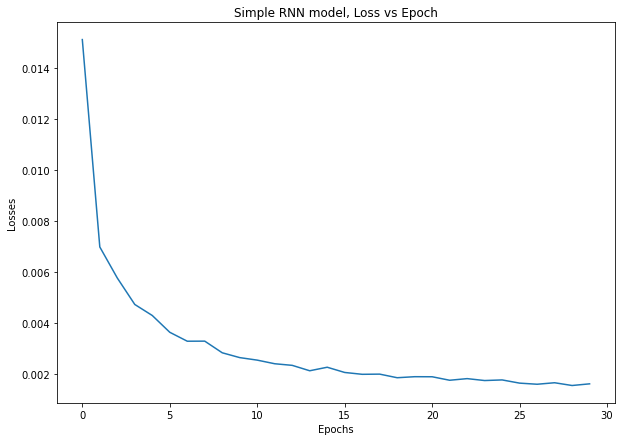

In [84]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

## Visualization

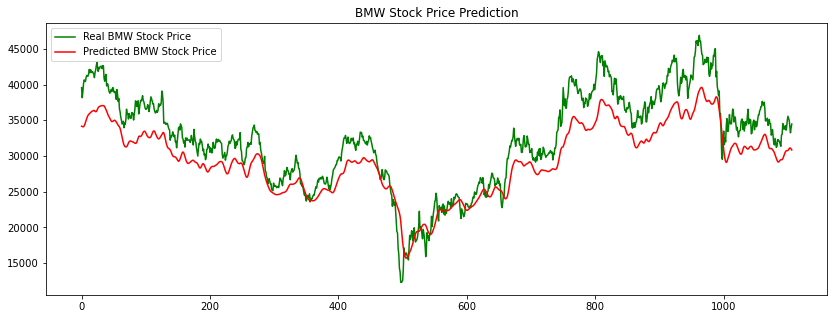

In [86]:
# BMW Stock Price Prediction Graph

plt.figure(figsize=(14, 5))
plt.plot(y_test, color = 'green', label = 'Real BMW Stock Price')
plt.plot(y_pred, color = 'red', label = 'Predicted BMW Stock Price')
plt.title("BMW Stock Price Prediction")
plt.legend()
plt.show()